# Worksheet 4 - Scientific Visualization MVE080/MMG640
## Geospatial data

This is the fourth worksheet in the course *Scientific Visualization*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualizations using plotnine.
Once you're finished with all the tasks, export this document as an HTML-file and upload it in Canvas.
You are encouraged to discuss problems and solutions with your fellow students (in the class-room but also on CampusWire), but each student must solve all tasks by themselves and hand-in their own report.
Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. Later on you can also include $\LaTeX$ in your Markdown cells.

It is not allowed to use Chat-GTP or any other large language model to directly answer any of the questions. Large language models can be excellent tools, e.g. for editing text (which you are allowed to do), but using them to directly answer a question is bad practice, as i) you do not learn anything, and ii) these models are often incorrect - and confidently reporting an incorrect answer is unprofessional. Any direct usage of Chat-GTP to answer questions will be considered cheating and reported. In summary, you are allowed to use Chat-GTP or similar models for text editing or to help with coding, but, you are responsible to ensure correctness of your answers.

The code below loads the packages required for this homework.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from plotnine import *
# Currently in a plotine dependancy they have deprication warning, so 
# we mute warnings to have a better experience
import warnings
warnings.filterwarnings("ignore")

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 15 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1

As the earth is not flat (and neither a [Möbius strip](https://en.wikipedia.org/wiki/M%C3%B6bius_strip)) when working with 2-dimensional maps we have to use a projection. Describe one scenario where it would not be suitable to use the Mercator's projection.

### Answer 1.1
_Mercator's projection will produce severe area distortions. If we want to compare the area of two countries, one near the poles and the other one near the equator, then using Mercator might be a bad idea._

### Question 1.2

A common form of visualization for maps is the Choropleth map (e.g slide 17 lecture 5). Briefly discuss two important aspects to consider when creating a choropleth map. 

### Answer 1.2
_1.Choose appropriate granularity, sometimes binning with a reasonable interval helps ("continuous" to "discrete")._

_2.Remember to address missing data because different datasets can have different naming schemes for countries._

### Question 1.3

Sometimes to avoid area problems a more abstract map representation can be beneficial. Which abstract representation of Fig. 15.15 and Fig. 15.16 in the course book do you think work the best? Motivate!

### Answer 1.3
_I think Fig. 15.16 is better. Because median income is what we really care in this case, if we introduce the second variable proportion, we will find it hard to see the income of less populous states (some even have collapsed)._

### Question 1.4

When creating a visual, what are three sources that often cause unwilling misleading?

### Answer 1.4
_1.Not keeping the audience’s background in mind._

_2.Storyteller’s bias and conformation bias._

_3.Pattern bias_

## Geospatial data  

For this part reading chapter 15 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help. You need to have **geopandas** installed for this part (it should be installed if you have used the yml-file on the webpage).

### Question 2.1

Let us take a closer look at Starbucks. Produce two visuals where i) you use dots and ii) where you use colors (here you can represent countries without Starbucks as white) to show the number of Starbucks stores in different Asian countries. 

*Hint - you can merge on iso_a3*

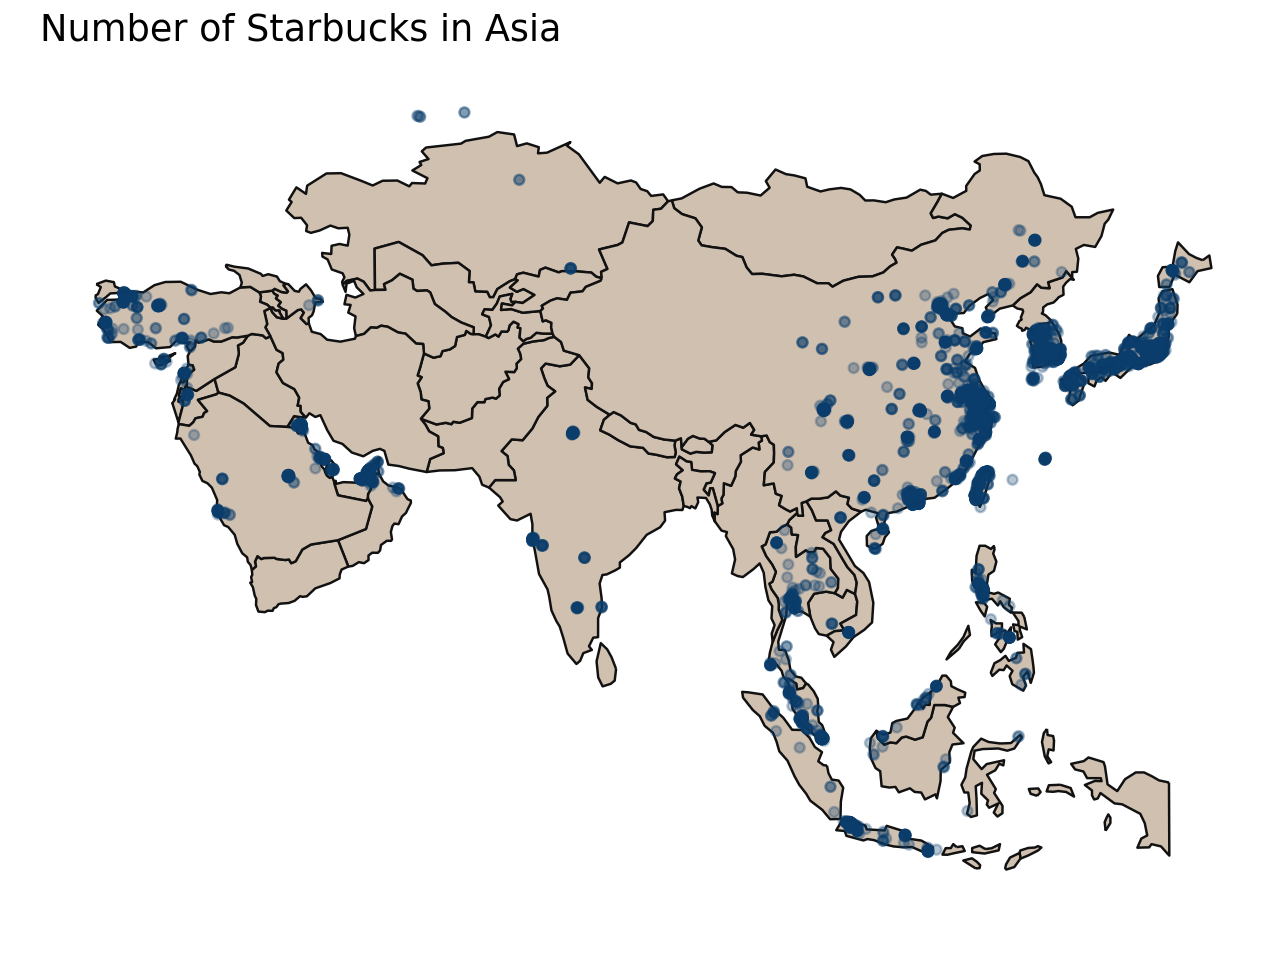


   iso_a3  count
0     ARE    144
1     AZE      4
2     BHR     21
3     BRN      5
4     CHN   2734
5     CYP     10
6     IDN    268
7     IND     88
8     JOR     17
9     JPN   1237
10    KAZ      8
11    KHM      4
12    KOR    993
13    KWT    106
14    LBN     29
15    MYS    234
16    OMN     12
17    PHL    298
18    QAT     18
19    RUS      6
20    SAU    102
21    SGP    130
22    THA    289
23    TUR    231
24    TWN    394
25    VNM     25


In [5]:
# Insert code here for visual 1
df = pd.read_csv('Starbucks_data-1.csv')
df = df[df['Timezone'].str.contains('Asia')]
col_highlight = ["#0A3D6B", "#D0C0B0", "#B6C2CC", "#BEAAB4", "#ECE9CD", "#0D5C3D", "#812F02"]

df1 = df.groupby('iso_a3').size().reset_index(name='count')
df1
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
asia = world[world['continent'] == 'Asia']

merged_data = asia.merge(df1, left_on='iso_a3', right_on='iso_a3', how='left')

p1 = (ggplot(merged_data)
    + geom_map(fill=col_highlight[1])
    + geom_point(data = df, mapping=aes(x="Longitude", y="Latitude"), color=col_highlight[0], alpha=0.3)
    + labs(title = "Number of Starbucks in Asia")
    + labs(x = "", y = "")
    + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank()))
print(p1)

print(df1)

# Remember to print the visual 

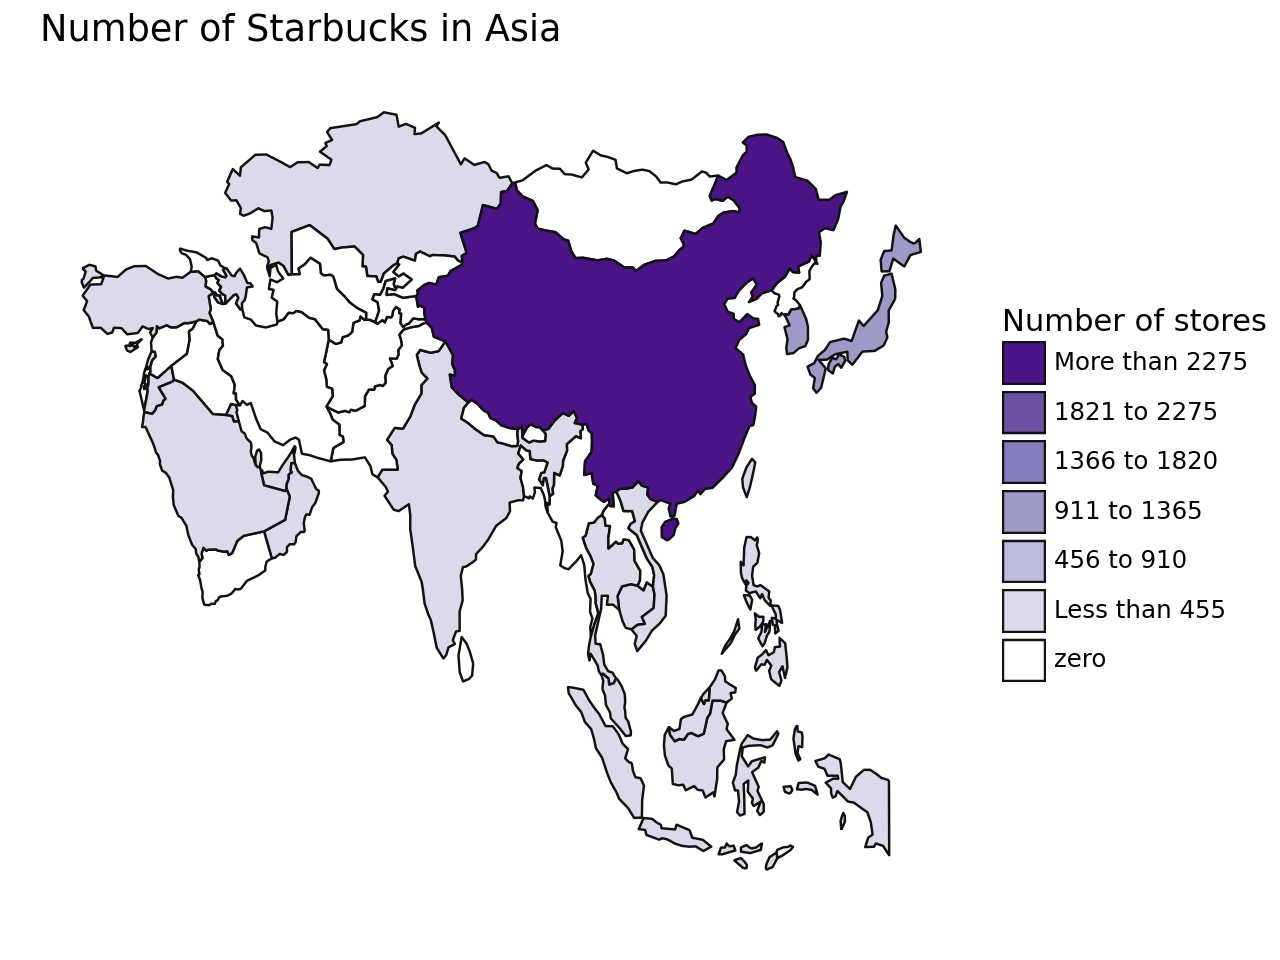

<Figure Size: (640 x 480)>

In [6]:
# Insert code here for visual 2
max_val = np.max(merged_data["count"])
min_val = np.min(merged_data["count"])
class_size = (max_val - min_val) / 6
# print(class_size)

conditions = [pd.isna(merged_data["count"]),
              (merged_data["count"].ge(class_size*0) & merged_data["count"].lt(class_size*1)), 
              (merged_data["count"].ge(class_size*1) & merged_data["count"].lt(class_size*2)), 
              (merged_data["count"].ge(class_size*2) & merged_data["count"].lt(class_size*3)), 
              (merged_data["count"].ge(class_size*3) & merged_data["count"].lt(class_size*4)), 
              (merged_data["count"].ge(class_size*4) & merged_data["count"].lt(class_size*5)), 
              (merged_data["count"].ge(class_size*5) & merged_data["count"].lt(class_size*6.5))]
choices = ["zero","Less than 455", "456 to 910", "911 to 1365", "1366 to 1820", "1821 to 2275", "More than 2275"]
merged_data["N_stores_quant"] = pd.Categorical(np.select(conditions, choices), 
                                                       categories=choices[::-1])

col_use = ['white', "#dadaeb", "#bcbddc", "#9e9ac8", "#807dba", "#6a51a3", "#4a1486"]

# print(merged_data['count'].dtype)
# print(merged_data['count'])
# print(merged_data['N_stores_quant'])

p2 = (ggplot(merged_data)
      + geom_map(aes(fill = 'N_stores_quant'))
      # + geom_map(aes(fill = 'count'))
      # + scale_color_cmap('PiYG')
      + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank())
      + labs(title = "Number of Starbucks in Asia")
      + scale_fill_manual(values=col_use[::-1], name = "Number of stores")
      # + scale_fill_manual(values=col_use[::-1], name="Number of stores")
            )
p2

# Remember to print the visual 

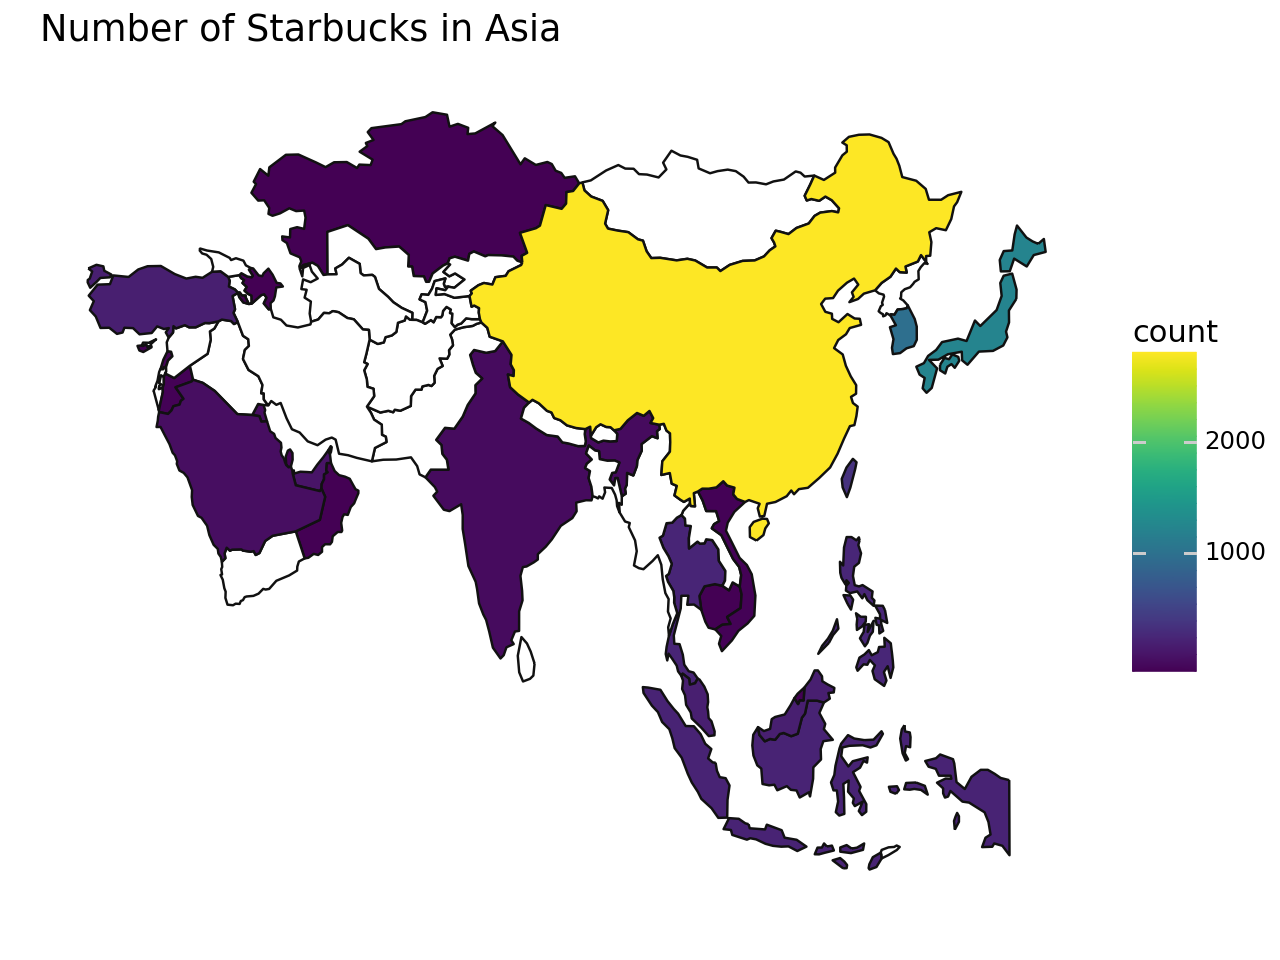

<Figure Size: (640 x 480)>

In [13]:
# merged_data['count'] = merged_data['count'].fillna(0)
p3 = (ggplot(merged_data)
      + geom_map(aes(fill = 'count'))
      + scale_fill_cmap('Blues')
      # + scale_fill_cmap()
      + scale_fill_cmap(na_value='white') 
      # + geom_map(aes(fill = 'count'))
      # + scale_color_cmap('PiYG')
      + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank())
      + labs(title = "Number of Starbucks in Asia")
      # + scale_fill_manual(values=col_use[::-1], name = "Number of stores")
      # + scale_fill_manual(values=col_use[::-1], name="Number of stores")
            )
p3
# print(merged_data.head())

## Question 2.2

On Canvas I have uploaded two datasets with percentage of a countries surface that is covered by forests in 1990 and 2019. Create a visual which clearly shows how forest coverage has changed between 1970 and 2019.

Motivate choice of projection!

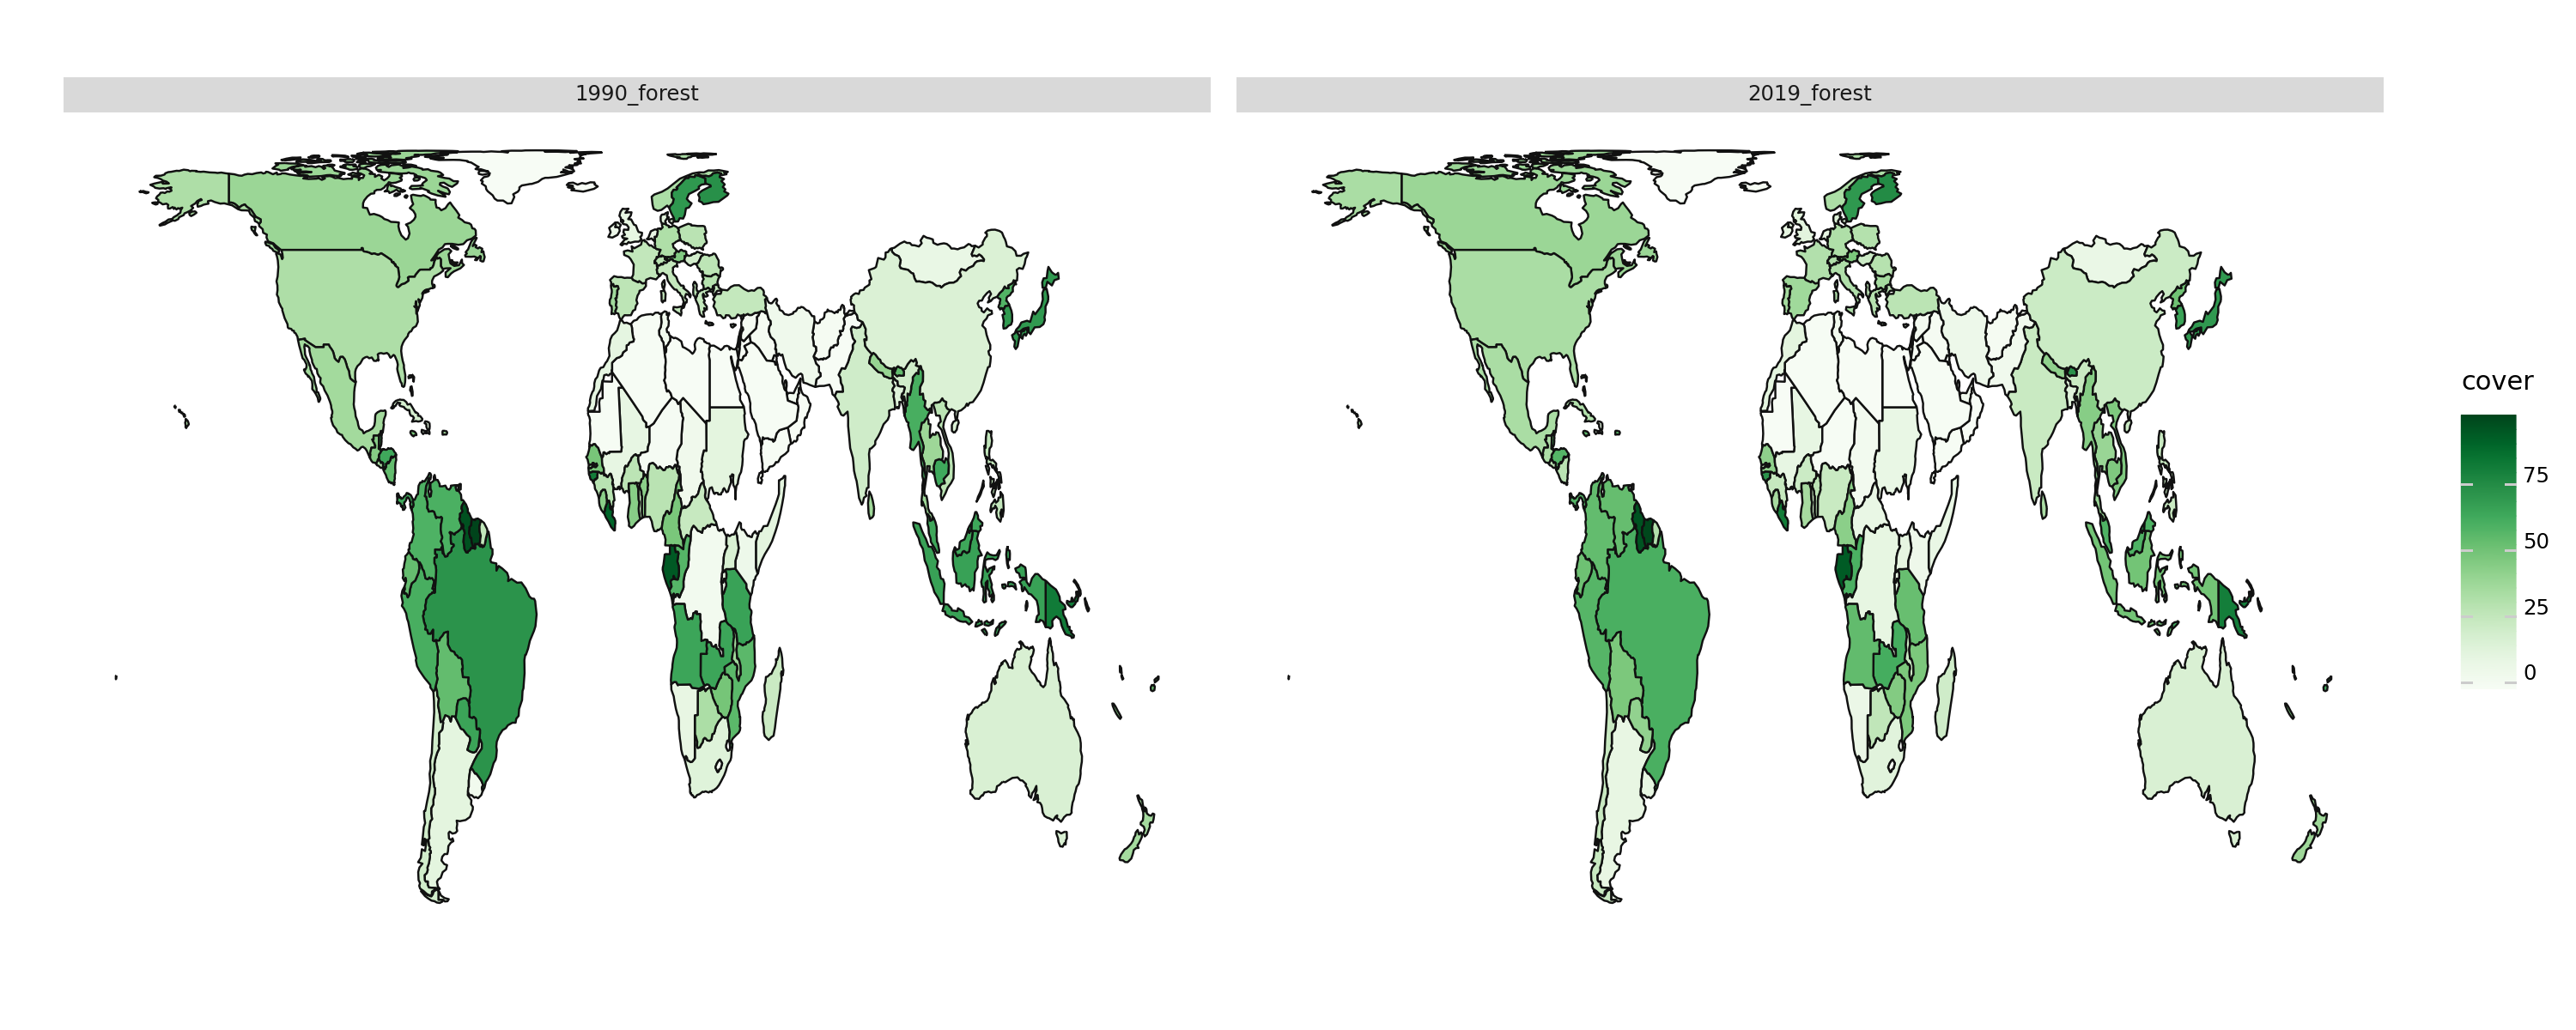

<Figure Size: (1500 x 600)>

In [7]:
# Insert code here for the visual
f1990 = pd.read_csv('Forest_1990-1.csv')
f2019 = pd.read_csv('Forest_2019-1.csv') 
merged_data = f1990.merge(f2019, left_on='Country', right_on='Country')
merged_data = pd.melt(merged_data, id_vars=["Country"], value_vars=["1990_forest", '2019_forest'])
new_column_mapping = {'variable': 'year', 'value': 'cover'}
merged_data = merged_data.rename(columns=new_column_mapping)

# print(merged_data.iloc[0,], merged_data.iloc[194,])
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_lambert = world.to_crs('EPSG:6933')
data = world_lambert.merge(merged_data, left_on = 'name', right_on = 'Country')

p = (ggplot(data, aes(fill = 'cover'))
     + geom_map()
     + scale_fill_cmap('Greens')
     + facet_wrap('~ year')
     + theme(figure_size=(15, 6),
             panel_background=element_rect(fill = "white"),
             axis_ticks=element_blank(), 
             axis_text=element_blank()
             )
     )
p
# p = (ggplot(merged_data))

# Remember to print the visual 

*We are interested in the forest coverage of various countries, and this measure is related to the area of each country. Therefore, when plotting, we need a projection that preserves area. The EPSG:6933 projection fulfills this requirement.*

## Question 2.3

On Canvas I have uploaded a dataset of ILI activity level, a measure used to monitor the flu activity in the USA. Visualize the activity level in the USA using a choropleth visual with discrete binning of the different categories (like slide 13 lecture 7). Produce two visuals with different binning schemes, motivate which one you think works the best for this data.

The code below helps you read the USA map.

In [6]:
# Read USA map and filter away Alaska, Hawaii and non-mainland territories
'''
map_USA = gpd.read_file("path_USA_map")
map_USA = map_USA.loc[map_USA["STUSPS"] != "VI"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "MP"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "GU"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "HI"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "AK"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "PR"]
'''

'\nmap_USA = gpd.read_file("path_USA_map")\nmap_USA = map_USA.loc[map_USA["STUSPS"] != "VI"]\nmap_USA = map_USA.loc[map_USA["STUSPS"] != "MP"]\nmap_USA = map_USA.loc[map_USA["STUSPS"] != "GU"]\nmap_USA = map_USA.loc[map_USA["STUSPS"] != "HI"]\nmap_USA = map_USA.loc[map_USA["STUSPS"] != "AK"]\nmap_USA = map_USA.loc[map_USA["STUSPS"] != "PR"]\n'

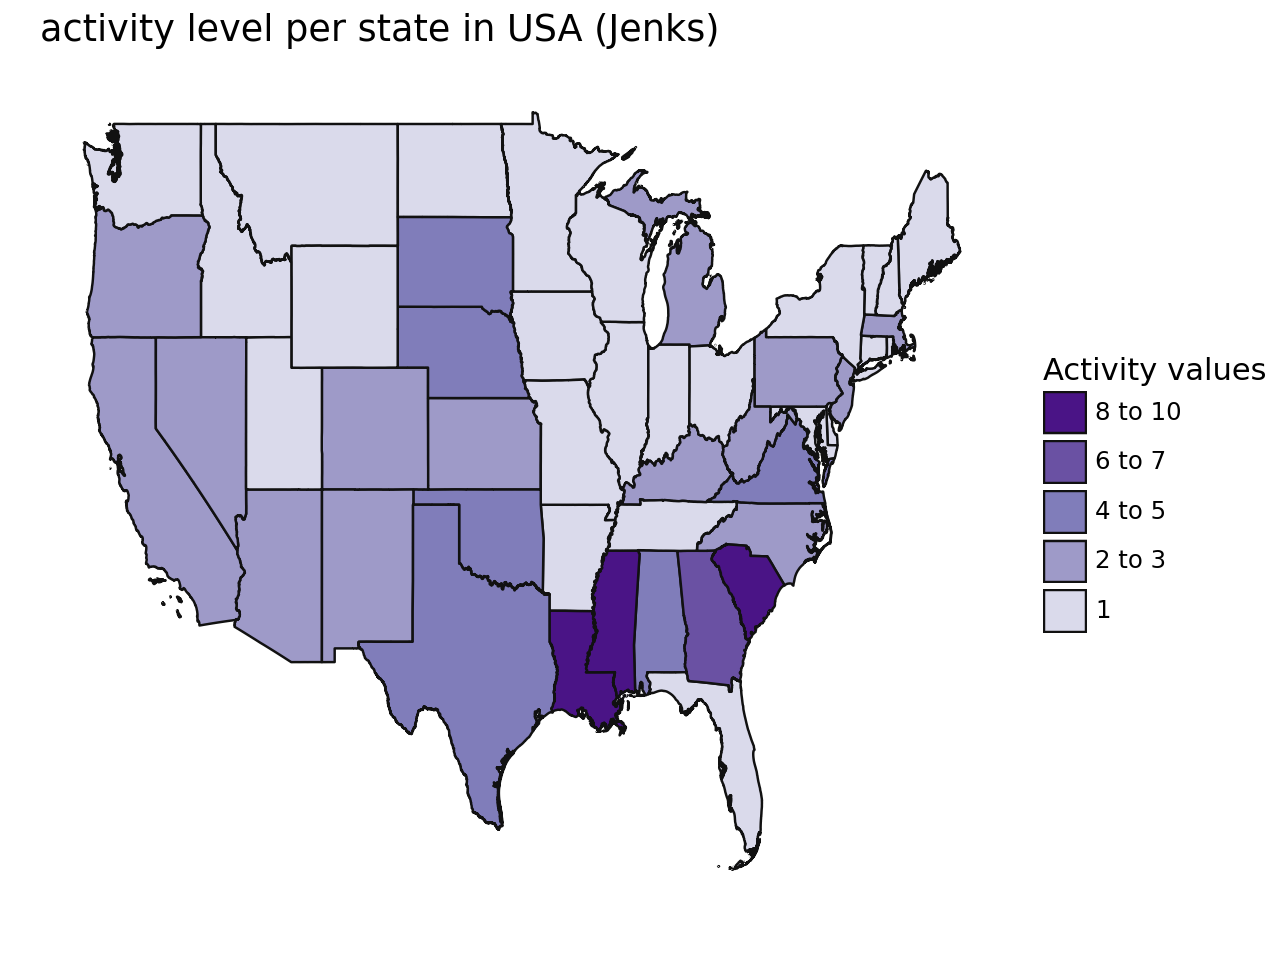

<Figure Size: (640 x 480)>

In [15]:
# Insert code here for visual 1
# first let's try jenks alg
# R code:
# setwd('D:/CTH/scivisual/4')

# library(classInt)
# data = read.csv('Flu_data.csv')
# active_level = data$activity_level

# k = 5
# jenks_intervals = classIntervals(active_level, n = k, style = "jenks")
# print(jenks_intervals)
#  ----------------------------------------------------------------
# style: jenks
#   one of 15 possible partitions of this variable into 5 classes
#  [1,1]  (1,3]  (3,5]  (5,7] (7,10] 
#     25     17      8      1      3 

map_USA = gpd.read_file("cb_2018_us_state_500k-1/cb_2018_us_state_500k.shp")
map_USA = map_USA.loc[map_USA["STUSPS"] != "VI"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "MP"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "GU"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "HI"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "AK"]
map_USA = map_USA.loc[map_USA["STUSPS"] != "PR"]

us_flu = pd.read_csv('Flu_data.csv')
data = us_flu.merge(map_USA, left_on = 'statename', right_on = 'NAME')
data

conditions = [data['activity_level'] == 1,
              ((data['activity_level'] > 1) & (data['activity_level'] <= 3)),
              ((data['activity_level'] > 3) & (data['activity_level'] <= 5)),
              ((data['activity_level'] > 5) & (data['activity_level'] <= 7)),
              ((data['activity_level'] > 7) & (data['activity_level'] <= 10))]

choices = ['1', '2 to 3', '4 to 5', '6 to 7', '8 to 10']
data['quant'] = pd.Categorical(np.select(conditions, choices), categories = choices[::-1])

col_use = ["#dadaeb", "#9e9ac8", "#807dba", "#6a51a3", "#4a1486"]
p = (ggplot(data)
     + geom_map(aes(fill = 'quant'))
     + scale_fill_manual(values = col_use[::-1], name = 'Activity values')
     + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank())
     + labs(title = 'activity level per state in USA (Jenks)'))
p
# Remember to print the visual 

1.0


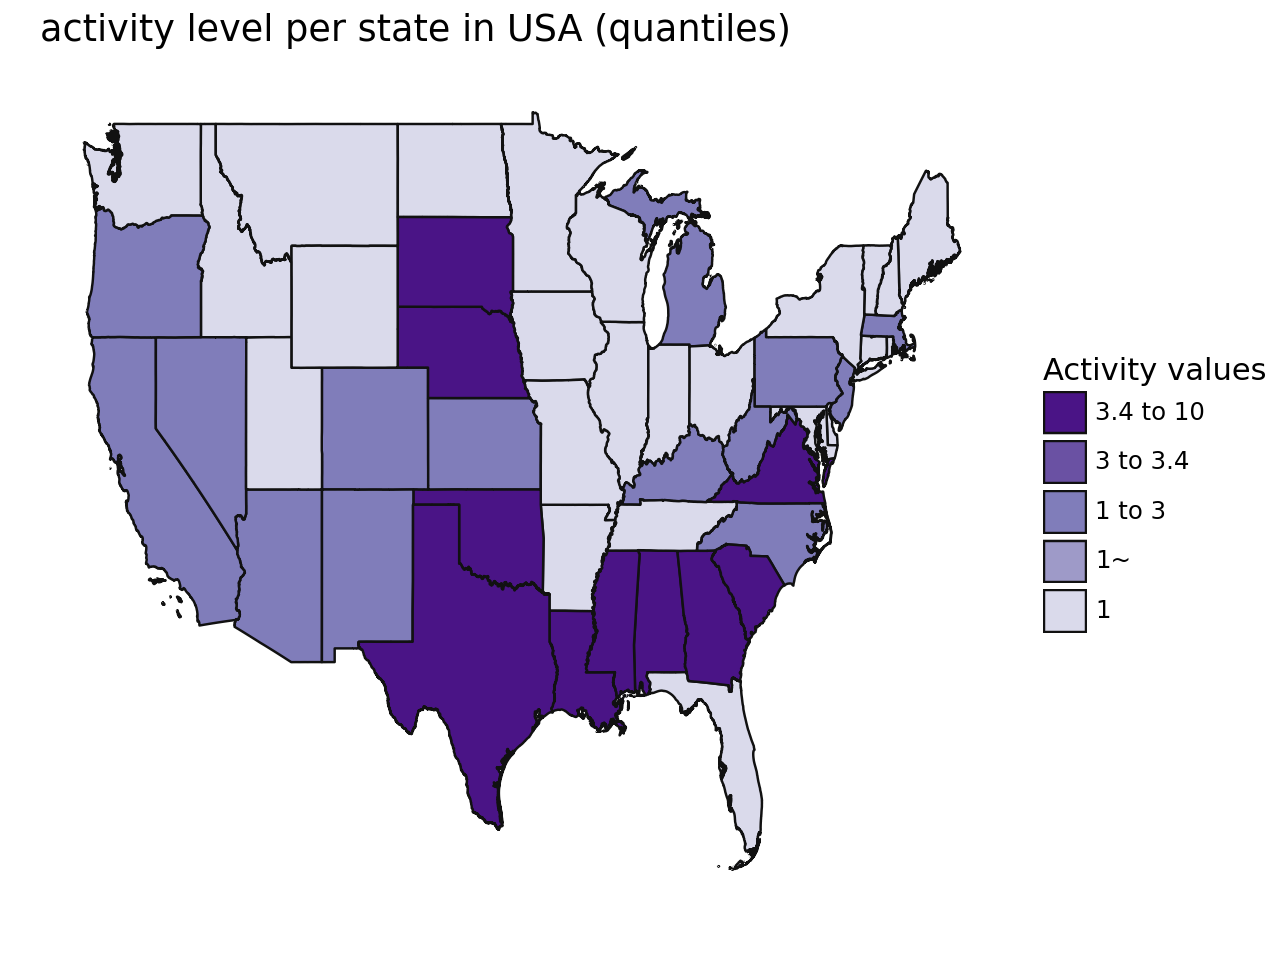

<Figure Size: (640 x 480)>

In [14]:
# Insert code here for visual 2
quantile_val = np.quantile(data['activity_level'], [0.2, 0.4, 0.6, 0.8])
print(quantile_val[0])

conditions = [data['activity_level'] <= quantile_val[0],
              ((data['activity_level'] >= quantile_val[0]) & (data['activity_level'] <= quantile_val[1])),
              ((data['activity_level'] >= quantile_val[1]) & (data['activity_level'] <= quantile_val[2])),
              ((data['activity_level'] >= quantile_val[2]) & (data['activity_level'] <= quantile_val[3])),
              ((data['activity_level'] >= quantile_val[3]))]

choices = ['1', '1~', '1 to 3', '3 to 3.4', '3.4 to 10']

data['quant'] = pd.Categorical(np.select(conditions, choices), categories = choices[::-1])

col_use = ["#dadaeb", "#9e9ac8", "#807dba", "#6a51a3", "#4a1486"]
p = (ggplot(data)
     + geom_map(aes(fill = 'quant'))
     + scale_fill_manual(values = col_use[::-1], name = 'Activity values')
     + labs(title = 'activity level per state in USA (quantiles)')
     + theme(panel_background=element_rect(fill = "white"), 
            axis_ticks=element_blank(), 
            axis_text=element_blank()))
p
# Remember to print the visual 

*I think we should choose the Jenks algorithm in this case. Because the activity level we're trying to plot here is an integral variable. If we use 'quantiles' or 'Constant interval,' we might end up with two identical categories or some boundary values that don't make practical sense (e.g., 3.4, and there is no state with a level of 3.4). And these two binning schime both will leads to losing resolution at lower and upper tails*